In [22]:
import logging

import anndata
import numpy as np
import pandas as pd
import plotnine as p
import matplotlib.pyplot as plt
from mizani.transforms import trans, trans_new
import scvi
from scvi.model.utils import mde
import scHPL
import torch
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

In [4]:
frac_stats = pd.read_csv('frac_stats.csv', index_col = 0)

In [5]:
history_df = pd.read_csv('history_df.csv', index_col = 0)

In [6]:
history_df

,epoch,variable,value
0,0,reconstruction_loss_train,271085.031250
1,1,reconstruction_loss_train,48112.417969
2,2,reconstruction_loss_train,6560.387207
3,3,reconstruction_loss_train,4872.390137
4,4,reconstruction_loss_train,4697.051270
...,...,...,...
75,35,reconstruction_loss_validation,3731.261963
76,36,reconstruction_loss_validation,3729.708984
77,37,reconstruction_loss_validation,3769.084473
78,38,reconstruction_loss_validation,3722.366211


In [7]:
frac_stats

,epoch,frac_within
0,1,0.888780
1,2,0.926164
2,3,0.982995
3,4,0.989259
4,5,0.991686
5,6,0.991206
6,7,0.987883
7,8,0.987592
8,9,0.992750
9,10,0.992598


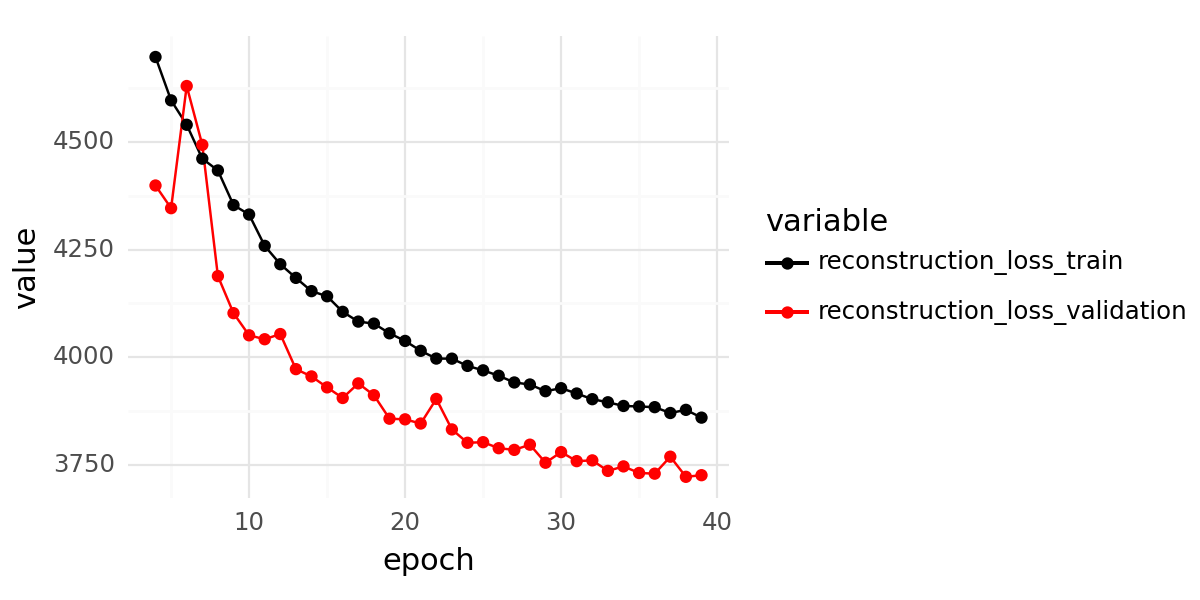

In [84]:
p.options.figure_size = 6, 3

p_ = (
    p.ggplot(p.aes(x = 'epoch', y = 'value', color = 'variable'), history_df.query('epoch > 3'))
    + p.geom_line()
    + p.geom_point()
    + p.scale_color_manual({'reconstruction_loss_train': 'black', 'reconstruction_loss_validation': 'red'})
    + p.theme_minimal()
)

p_.save('fig3.png', dpi = 300)

print(p_)

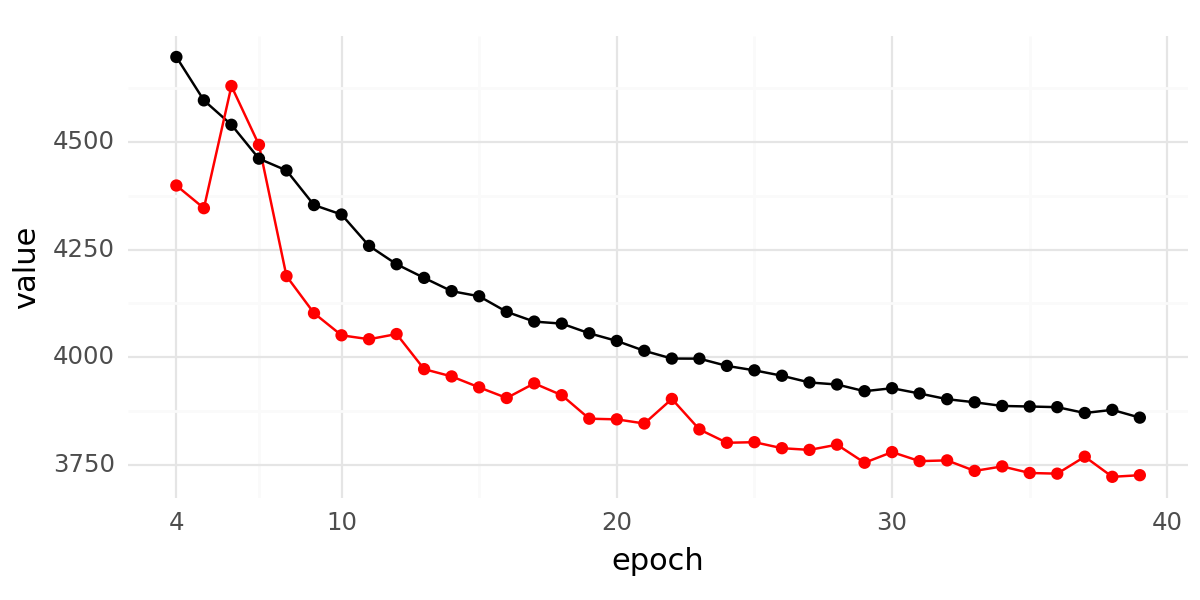

In [85]:
p.options.figure_size = 6, 3

p_ = (
    p.ggplot(p.aes(x = 'epoch', y = 'value', color = 'variable'), history_df.query('epoch > 3'))
    + p.geom_line()
    + p.geom_point()
    + p.scale_x_continuous(breaks = [4, 10, 20, 30, 40])
    + p.scale_color_manual({'reconstruction_loss_train': 'black', 'reconstruction_loss_validation': 'red'}, guide = False)
    + p.theme_minimal()
)

p_.save('fig4.png', dpi = 300)

print(p_)

In [50]:
class fisher_trans(trans):
    @staticmethod
    def transform(x):
        return np.arctanh(x)
    
    @staticmethod
    def inverse(x):
        return np.tanh(x)

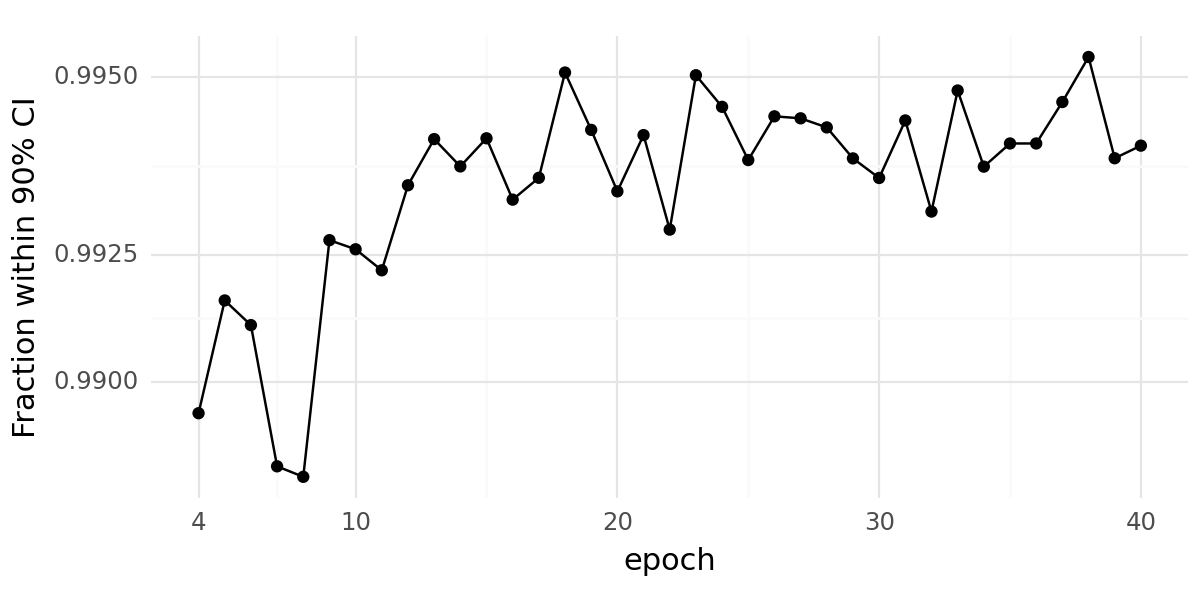

In [86]:
p.options.figure_size = 6, 3

p_ = (
    p.ggplot(p.aes(x = 'epoch', y = 'frac_within'), frac_stats.query('epoch > 3'))
    + p.geom_line()
    + p.geom_point()
    + p.scale_x_continuous(breaks = [4, 10, 20, 30, 40])
    + p.scale_y_continuous(trans = fisher_trans, breaks = [0.9, 0.95, 0.975, 0.99, 0.9925, 0.995])
    + p.theme_minimal()
    + p.labs(y = 'Fraction within 90% CI')
)

p_.save('fig5.png', dpi = 300)

print(p_)

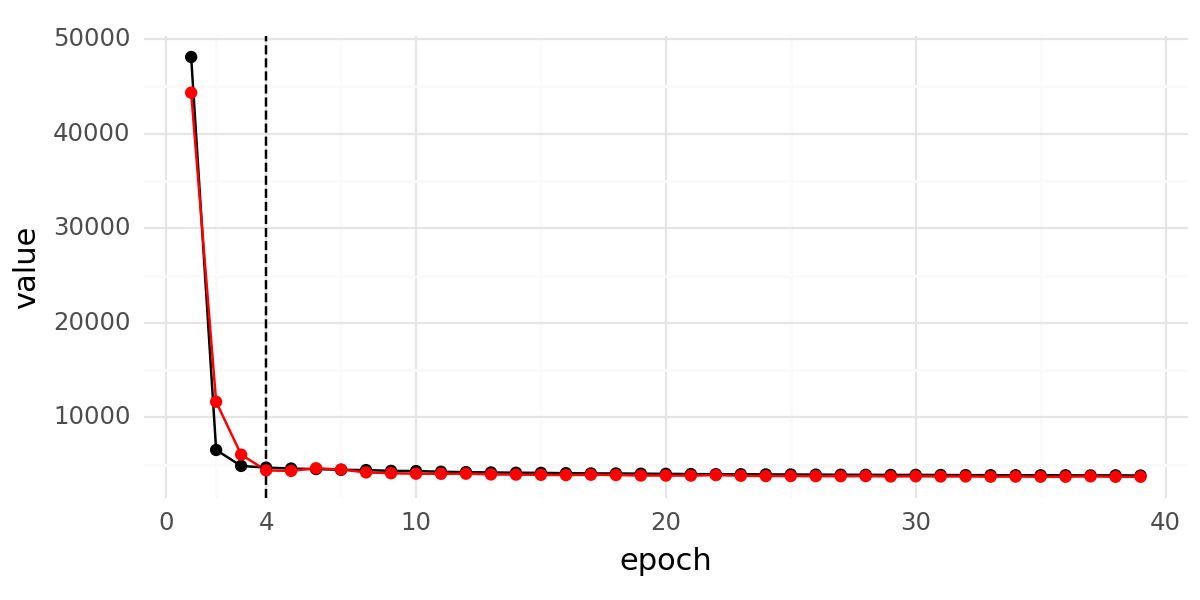

In [87]:
p.options.figure_size = 6, 3

p_ = (
    p.ggplot(p.aes(x = 'epoch', y = 'value', color = 'variable'), history_df.query('epoch > 0'))
    + p.geom_vline(xintercept = 4, linetype = 'dashed')
    + p.geom_line()
    + p.geom_point()
    + p.scale_x_continuous(breaks = [0, 4, 10, 20, 30, 40])
    + p.scale_color_manual({'reconstruction_loss_train': 'black', 'reconstruction_loss_validation': 'red'}, guide = False)
    + p.theme_minimal()
)

p_.save('fig6.png', dpi = 300)

print(p_)

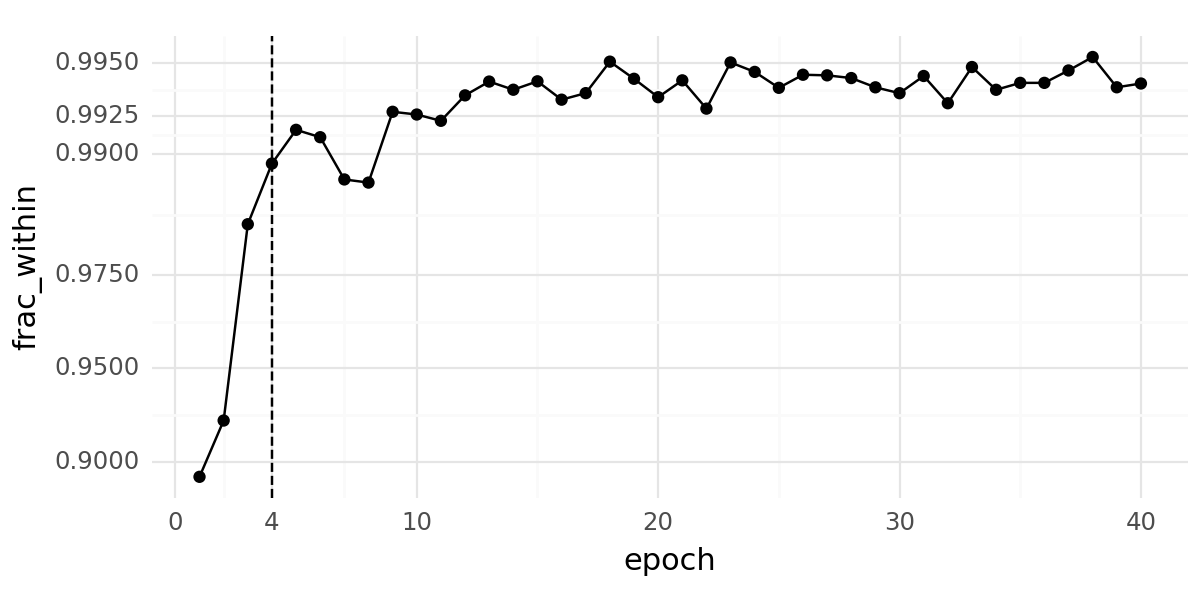

In [88]:
p.options.figure_size = 6, 3

p_ = (
    p.ggplot(p.aes(x = 'epoch', y = 'frac_within'), frac_stats.query('epoch > 0'))
    + p.geom_vline(xintercept = 4, linetype = 'dashed')
    + p.geom_line()
    + p.geom_point()
    + p.scale_x_continuous(breaks = [0, 4, 10, 20, 30, 40])
    + p.scale_y_continuous(trans = fisher_trans, breaks = [0.9, 0.95, 0.975, 0.99, 0.9925, 0.995])
    + p.theme_minimal()
)

p_.save('fig7.png', dpi = 300)

print(p_)